In [92]:
import time as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import spacy
from spacy.en import English

In [70]:
df = pd.read_csv('posts.csv',index_col='id')
df1 = pd.read_csv('Analytics All Web Site Data SEO report 20150820-20160220 (1).csv',index_col='post_id')
df2 = pd.read_csv('Analytics All Web Site Data SEO report 20150820-20160220.csv',index_col='post_id')
frames = [df1,df2]
df_pv = pd.concat(frames)
df = df_pv.join(df,how='inner')
df1 = df.drop(['Page','permalink', 'number_pages','publish_date_val'], axis=1)
df1['class'] = df1['Pageviews'].apply(lambda x: x>3000).astype(int)
df1['id_str'] = df1['primary_category_id'].astype(str)
df1.drop_duplicates(subset='title')
df1 = df1.dropna(axis=0)

In [16]:
def get_actions(parsed):
   actions = [el.lemma_ for el in parsed if el.pos == spacy.parts_of_speech.VERB]
   return actions

In [73]:
#titles = df1['title']
#nlp = English()
#for title in titles:
#    doc = nlp(unicode(title, 'utf-8'))
#    verbs = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.VERB]
#    nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.NOUN]
#    adjectives = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.ADJ]
#    print(len(verbs))

In [74]:
titles = df1['title']
df1['Noun'] = np.nan
df1['Verb'] = np.nan
df1['Adjective'] = np.nan

nounsCount= []
verbCount= []
adjCount= []

nlp = English()
for title in titles:
    doc = nlp(unicode(title, 'utf-8'))
    nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.NOUN]
    nounsCount.append(len(nouns)) 
    verbs = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.VERB]
    verbCount.append(len(verbs)) 
    adjectives = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.ADJ]   
    adjCount.append(len(adjectives)) 

In [75]:
df1['Noun'] = nounsCount
df1['Verb'] = verbCount
df1['Adjective'] = adjCount

In [76]:
df1['has_10'] = df1['title'].str.contains('10').astype(int)
df1['best'] = df1['title'].str.contains('best').astype(int)
df1['worst'] = df1['title'].str.contains('worst').astype(int)
df1['time'] = df1['title'].str.contains('time').astype(int)
df1['buy'] = df1['title'].str.contains('buy').astype(int)
df1['new'] = df1['title'].str.contains('new').astype(int)
df1['season'] = df1['title'].str.contains('season').astype(int)


In [77]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'])
df1.set_index('publish_date', inplace=True)



In [80]:
df1['hour'] = df1.index.hour 



In [104]:
#dt.strptime("2015-10-13 07:46:00")
from dateutil import parser
df1['DayofWeek'] = parser.parse(df1.apply(lambda x: iloc[0:1,1]))
#df1['Pageviews'].apply(lambda x: x>3000).astype(int)
#hey = parser.parse("2015-10-13 07:46:00")
#print(df1.iloc[0:1,1])

NameError: ("global name 'iloc' is not defined", u'occurred at index Pageviews')

In [101]:
print hey.weekday()

1


In [82]:
df1.head()

,Pageviews,author_id,title,primary_category_id,class,id_str,Noun,Verb,Adjective,has_10,best,worst,time,buy,new,season,hour
publish_date,,,,,,,,,,,,,,,,,
2015-10-13 07:46:00,922,79,5 Warren Buffett Approved Dividend Stocks,45376,0,45376.0,5,0,0,0,0,0,0,0,0,0,7
2015-09-11 10:46:00,211440,1333,The 10 Least Expensive States to Live in the U.S.,448,1,448.0,4,1,0,1,0,0,0,0,0,0,10
2015-09-11 10:46:00,921,1333,The 10 Least Expensive States to Live in the U.S.,448,0,448.0,4,1,0,1,0,0,0,0,0,0,10
2016-01-15 14:31:00,9213,1232,15 Warren Buffett Quotes for a Scary Stock Market,45376,1,45376.0,5,1,0,0,0,0,0,0,0,0,14
2015-11-19 18:31:00,5528,1233,8 Top Grossing Football Movies of All Time,968,1,968.0,4,0,1,0,0,0,0,0,0,0,18


In [79]:
df1.head()

,Pageviews,author_id,title,primary_category_id,class,id_str,Noun,Verb,Adjective,has_10,best,worst,time,buy,new,season
publish_date,,,,,,,,,,,,,,,,
2015-10-13 07:46:00,922,79,5 Warren Buffett Approved Dividend Stocks,45376,0,45376.0,5,0,0,0,0,0,0,0,0,0
2015-09-11 10:46:00,211440,1333,The 10 Least Expensive States to Live in the U.S.,448,1,448.0,4,1,0,1,0,0,0,0,0,0
2015-09-11 10:46:00,921,1333,The 10 Least Expensive States to Live in the U.S.,448,0,448.0,4,1,0,1,0,0,0,0,0,0
2016-01-15 14:31:00,9213,1232,15 Warren Buffett Quotes for a Scary Stock Market,45376,1,45376.0,5,1,0,0,0,0,0,0,0,0
2015-11-19 18:31:00,5528,1233,8 Top Grossing Football Movies of All Time,968,1,968.0,4,0,1,0,0,0,0,0,0,0


In [28]:
df1['id_str'].value_counts()
df1 = df1.dropna(axis=0)

In [27]:
df1.head()

,Pageviews,author_id,title,publish_date,primary_category_id,class,id_str
414227,922,79,5 Warren Buffett Approved Dividend Stocks,10/13/15 7:46,45376,0,45376.0
415574,211440,1333,The 10 Least Expensive States to Live in the U.S.,9/11/15 10:46,448,1,448.0
415574,921,1333,The 10 Least Expensive States to Live in the U.S.,9/11/15 10:46,448,0,448.0
415891,9213,1232,15 Warren Buffett Quotes for a Scary Stock Market,1/15/16 14:31,45376,1,45376.0
424993,5528,1233,8 Top Grossing Football Movies of All Time,11/19/15 18:31,968,1,968.0


In [42]:
dfgroup = df1.groupby(by='class', axis=0)

In [43]:
dfgroup.describe()

Pageviews    author_id  primary_category_id
class                                                        
0     count     5073.000000  5073.000000          5073.000000
      mean       922.253105  1325.345555         52674.569683
      std        607.423753   240.521387         53931.364597
      min        461.000000    79.000000           448.000000
      25%        461.000000  1332.000000         13856.000000
      50%        921.000000  1387.000000         23977.000000
      75%       1382.000000  1405.000000        124485.000000
      max       2764.000000  1466.000000        124496.000000
1     count      921.000000   921.000000           921.000000
      mean     19608.031488  1327.970684         33326.775244
      std      73934.250359   160.541794         45039.948355
      min       3225.000000    79.000000           448.000000
      25%       4146.000000  1297.000000           968.000000
      50%       6910.000000  1357.000000         13856.000000
      75%      15202.000000  1393.000000         23977.000000
      max    2046219.000000  1461.000000        124496.000000

In [61]:

y, X = df1['class'], df1.drop(['class'], axis=1)
vect = CountVectorizer(decode_error='ignore')
vect.fit(df1.title)

vect.get_feature_names()

vect_trans = vect.transform(df1.title)
vect_trans.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
df = pd.DataFrame(vect_trans.toarray())
df['y'] = df1['class'].values

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4325,4326,4327,4328,4329,4330,4331,4332,4333,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
y, X = df.y, df.drop(['y'], axis=1)

In [67]:
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X))
X_scale.columns = X.columns

In [68]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [69]:


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



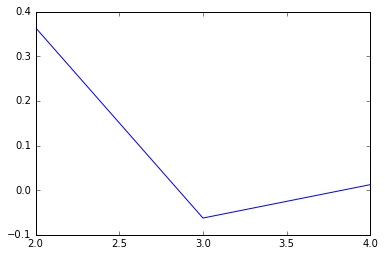

In [73]:

k = []
s = []
for n in range(2,5):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train)
    centers = km2.fit_predict(X_scale)

    k.append(n)
    s.append(silhouette_score(X_scale, centers))

plt.plot(k,s);

In [74]:
%%time
km = KMeans(n_clusters=3, n_init=20)
cluster_labels = km.fit_predict(X_scale)

CPU times: user 27.8 s, sys: 238 ms, total: 28.1 s
Wall time: 20.8 s


In [75]:
print km.inertia_

25927215.5289


In [76]:
from sklearn.metrics import silhouette_score
print silhouette_score(X_scale, cluster_labels)

-0.0621303573166


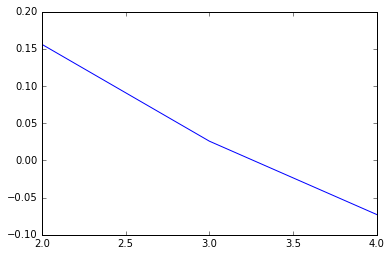

In [77]:

k = []
s = []
for n in range(2,5):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train)
    centers = km2.fit_predict(X_scale)

    k.append(n)
    s.append(silhouette_score(X_scale, centers))

plt.plot(k,s);